## SVM in SKlearn

In [1]:
import sys
sys.path.append("C:/Users/Jeff/udacity/Intro_to_Machine_Learning/ud120-projects/tools/")
sys.path.append('C:/Users/Jeff/udacity/Intro_to_Machine_Learning/ud120-projects/choose_your_own')
sys.path.append('C:/Users/Jeff/udacity/Intro_to_Machine_Learning/ud120-projects/svm')

import os
os.chdir('C:/Users/Jeff/udacity/Intro_to_Machine_Learning/ud120-projects/svm')


from class_vis import prettyPicture
from prep_terrain_data import makeTerrainData

import sys
import matplotlib.pyplot as plt
import copy
import numpy as np
import pylab as pl

from sklearn.metrics import accuracy_score


features_train, labels_train, features_test, labels_test = makeTerrainData()


########################## SVM #################################
from sklearn.svm import SVC

def submitAccuracy():
    return accuracy_score(pred, labels_test)

clf = SVC(kernel="linear")
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

print accuracy_score(pred, labels_test)

0.92


## Kernel and Gamma

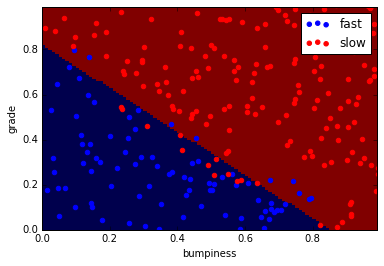

In [2]:
clf = SVC(kernel="linear", gamma=1.0)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

%matplotlib inline
prettyPicture(clf, features_test, labels_test)

## SVM `C` Parameter

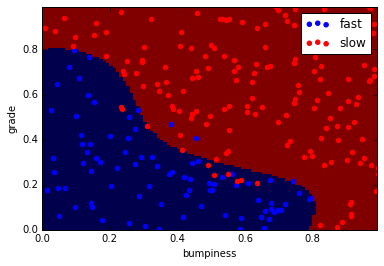

In [3]:
clf = SVC(kernel="rbf", C=10**5)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

%matplotlib inline
prettyPicture(clf, features_test, labels_test)

## SVM `gamma` Parameter

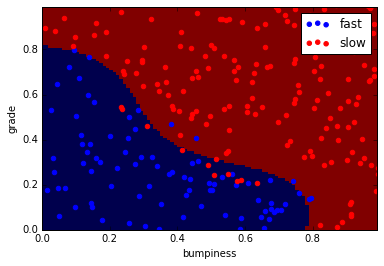

In [4]:
clf = SVC(kernel="rbf", gamma=10)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

%matplotlib inline
prettyPicture(clf, features_test, labels_test)

## SVM Author ID Accuracy & Timing

In [5]:
#!/usr/bin/python

""" 
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:    
    Sara has label 0
    Chris has label 1
"""
from sklearn.metrics import accuracy_score

from time import time
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()


def my_svm(features_train, features_test, labels_train, labels_test, kernel='linear', C=1.0):
    # the classifier
    clf = SVC(kernel=kernel, C=C)

    # train
    t0 = time()
    clf.fit(features_train, labels_train)
    print "\ntraining time:", round(time()-t0, 3), "s"

    # predict
    t0 = time()
    pred = clf.predict(features_test)
    print "predicting time:", round(time()-t0, 3), "s"

    accuracy = accuracy_score(pred, labels_test)

    print '\naccuracy = {0}'.format(accuracy)
    return pred

pred = my_svm(features_train, features_test, labels_train, labels_test)

no. of Chris training emails: 7936
no. of Sara training emails: 7884

training time: 176.156 s
predicting time: 18.561 s

accuracy = 0.984072810011


## A Smaller Training Set

In [6]:
features_train2 = features_train[:len(features_train)/100] 
labels_train2 = labels_train[:len(labels_train)/100] 

pred = my_svm(features_train2, features_test, labels_train2, labels_test)


training time: 0.124 s
predicting time: 1.123 s

accuracy = 0.884527872582


## Deploy an RBF Kernel

In [7]:
pred = my_svm(features_train2, features_test, labels_train2, labels_test, 'rbf')


training time: 0.128 s
predicting time: 1.246 s

accuracy = 0.616040955631


## Optimize `C` Parameter

In [8]:
for C in [10, 100, 1000, 10000]:
    print 'C =',C,
    pred = my_svm(features_train2, features_test, labels_train2, labels_test, kernel='rbf', C=C)
    print '\n\n'

C = 10 
training time: 0.133 s
predicting time: 1.245 s

accuracy = 0.616040955631



C = 100 
training time: 0.109 s
predicting time: 1.244 s

accuracy = 0.616040955631



C = 1000 
training time: 0.109 s
predicting time: 1.19 s

accuracy = 0.821387940842



C = 10000 
training time: 0.11 s
predicting time: 1.006 s

accuracy = 0.892491467577





## Optimized RBF vs. Linear SVM: Accuracy

In [9]:
pred = my_svm(features_train, features_test, labels_train, labels_test, kernel='rbf', C=10000)


training time: 116.73 s
predicting time: 11.745 s

accuracy = 0.990898748578


## Extracting Predictions from an SVM

In [10]:
print pred[10]
print pred[26]
print pred[50]

1
0
1


## How many Chris emails predicted?

In [11]:
print sum(pred)

877
